In [1]:
import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.optimize import minimize
"""
Own packages
"""

from codelib.visualization.layout import DefaultStyle
DefaultStyle();

# Exercises - Week 1

In this week we will look at a few exercises involving the `numpy` package. The `numpy` package is a package for numeric programming that allows us to work with vectors and matrices (arrays), perform a range of operations in linear algebra, simulate random numbers, etc.   The documentation for `numpy` can be found [here](https://numpy.org/doc/stable/reference/index.html). 

In this exercies set, we will look at basic vector and matrix operations using `numpy`, but also the sub-packages

* `numpy.random` : Used to simulate random numbers
* `numpy.linalg` : Used for linear algebra operations




## Problem 1: Ordinary least squares

Consider the regression model 

$$
\begin{equation*}
\mathbf{Y} =  \mathbf{X}\boldsymbol{\theta} + \boldsymbol{\varepsilon}
\end{equation*}
$$

where

$$
\boldsymbol{\theta} = \begin{bmatrix} \alpha \\ \beta_{x_1} \\ \beta_{x_2} \end{bmatrix}, \; \mathbf{Y} = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}, \; \mathbf{X} = \begin{bmatrix} 1 & x_{11} & x_{21} \\ \vdots & \vdots & \vdots \\ 
1 & x_{1n} & x_{2n}\end{bmatrix}, \; \boldsymbol{\varepsilon} = \begin{bmatrix} \varepsilon_1 \\ \vdots \\ \varepsilon_n \end{bmatrix}
$$

Assume that $x_{1i}$ and $x_{2i}$ are distributed as $N(0,4)$ with a correlation of $\rho$ and $\varepsilon_i \sim N(0,1)$. $\alpha=1, \beta_{x_1}=1, \beta_{x_2}=1$.  

__Question 1__

Simulate 50 observations from this regression model when the correlation is zero. It should be possible by only using the functions `numpy.random.multivariate_normal`, `numpy.random.normal`, `numpy.zeros`, `numpy.ones`, `numpy.column_stack` and `@`, `+` operators. 


__Question 2__

Given the simulated $\mathbf{Y}$ vector and $\mathbf{X}$ matrix, then we can estimate the parameters using the matrix formula for the ordinary least squares estimator:

$$
\hat{\boldsymbol{\theta}} = \left(\mathbf{X}^\top  \mathbf{X}  \right)^{-1} \mathbf{X}^\top \mathbf{Y}
$$

Estimate the parameters. One could use the function `numpy.linalg.lstsq` directly. 

__Question 3__

We want to perform a simulation study to show the effect of low and high correlation between dependent variables. We repeat the simulation and estimation from question 1 and 2 10,000 times for the case $\rho = 0.0$ and for the case $\rho = 0.95$. Store the estimates in `theta_uncorr` and `theta_corr`. 

__Question 4__

Calculate the mean and standard deviation of the parameter estimates. Note that a `numpy.ndarray` has the methods `mean` and `std`. 

__Question 5__

Plot scatter plots between $\hat{\beta}_{x_1}$ and $\hat{\beta}_{x_2}$ for the two cases. What are the main take away from this and the previous question?

One could use the code

```python
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 2, figsize=(16, 5))

ax1 = ax[0]

ax1.scatter(theta_uncorr[:, 1], theta_uncorr[:, 2], color="blue", alpha=0.5)

ax1.set_xlabel('$\\hat{\\beta}_{x_1}$', size=15)
ax1.set_ylabel('$\\hat{\\beta}_{x_2}$', size=15)
ax1.set_title('Scatterplot: $\\hat{\\beta}_{x_1}$ vs. $\\hat{\\beta}_{x_2}$ for  $\\rho = 0.0$', size=15)

ax2 = ax[1]

ax2.scatter(theta_corr[:, 1], theta_corr[:, 2], color="blue", alpha=0.5)

ax2.set_xlabel('$\\hat{\\beta}_{x_1}$', size=15)
ax2.set_ylabel('$\\hat{\\beta}_{x_2}$', size=15)
ax2.set_title('Scatterplot: $\\hat{\\beta}_{x_1}$ vs. $\\hat{\\beta}_{x_2}$ for  $\\rho = 0.95$', size=15)

```

### Solution

__Question 1__

In [2]:
N = 50
theta = np.array([1.0, 1.0, 1.0])
rho = 0.0
mu_x = np.array([0.0, 0.0])
vol_x = np.array([2.0, 2.0])
cov_x = np.outer(vol_x, vol_x) * np.array([[1.0, rho], [rho, 1.0]])

X = np.random.multivariate_normal(mu_x, cov_x, size=N)
X = np.column_stack((np.ones(50), X))

eps = np.random.normal(size=50)

Y = X @ theta + eps

__Question 2__

In [3]:
theta, resid, rank, s = np.linalg.lstsq(X, Y, rcond=-1) 

print(("""OLS parameter estimates: \n
alpha = {:.4f}
beta_x1 = {:.4f}
beta_x2 = {:.4f}""").format(*theta))

OLS parameter estimates: 

alpha = 0.8792
beta_x1 = 0.9994
beta_x2 = 0.9765


__Question 3__

In [4]:
def simulation(N, theta, rho, mu_x, vol_x, num_sim = 10000): 
    
    cov_x = np.outer(vol_x, vol_x) * np.array([[1.0, rho], [rho, 1.0]])

    all_thetas = np.zeros((num_sim, len(theta)))
    
    for i in range(num_sim): 
        
        X = np.random.multivariate_normal(mu_x, cov_x, size=N)
        X = np.column_stack((np.ones(N), X))

        eps = np.random.normal(size=N)

        Y = X @ theta + eps

        all_thetas[i, :], resid, rank, s  = np.linalg.lstsq(X,Y, rcond=-1) 
        
    return all_thetas

In [5]:
theta_uncorr = simulation(N, theta, 0.0, mu_x, vol_x, num_sim = 10000)
theta_corr = simulation(N, theta, 0.95, mu_x, vol_x, num_sim = 10000)

__Question 4__

In [6]:
theta_uncorr.mean(axis=0)

array([0.87870902, 0.99906332, 0.97457406])

In [7]:
theta_uncorr.std(axis=0)

array([0.14489985, 0.07383021, 0.07327256])

In [8]:
theta_corr.mean(axis=0)

array([0.87776123, 0.99860608, 0.97787805])

In [9]:
theta_corr.std(axis=0)

array([0.1439983 , 0.23851403, 0.2375301 ])

__Question 5__

Clearly, the high correlation between the dependent variables increases the variance of the OLS estimator!

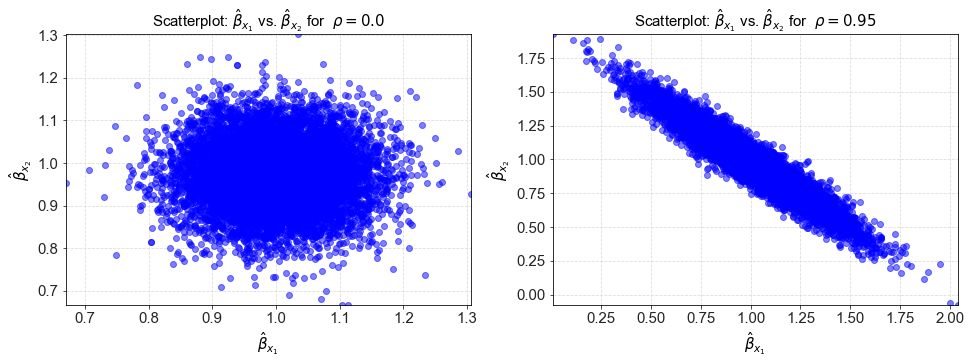

In [10]:

fig,ax = plt.subplots(1, 2, figsize=(16, 5))

ax1 = ax[0]

ax1.scatter(theta_uncorr[:, 1], theta_uncorr[:, 2], color="blue", alpha=0.5)

ax1.set_xlabel('$\\hat{\\beta}_{x_1}$', size=15)
ax1.set_ylabel('$\\hat{\\beta}_{x_2}$', size=15)
ax1.set_title('Scatterplot: $\\hat{\\beta}_{x_1}$ vs. $\\hat{\\beta}_{x_2}$ for  $\\rho = 0.0$', size=15)

ax2 = ax[1]

ax2.scatter(theta_corr[:, 1], theta_corr[:, 2], color="blue", alpha=0.5)

ax2.set_xlabel('$\\hat{\\beta}_{x_1}$', size=15)
ax2.set_ylabel('$\\hat{\\beta}_{x_2}$', size=15)
ax2.set_title('Scatterplot: $\\hat{\\beta}_{x_1}$ vs. $\\hat{\\beta}_{x_2}$ for  $\\rho = 0.95$', size=15);

## Problem 2: Stability of optimal portfolio weights

Consider three assets defined by the following information 

$$
\boldsymbol{\mu}  = \begin{bmatrix} 0.02 \\ 0.04 \\ 0.08 \end{bmatrix}, \; \mathbf{v} = \begin{bmatrix} 0.075 \\ 0.15 \\ 0.3 \end{bmatrix}, \; \textbf{Corr} = \begin{bmatrix} 1.0 & 0.0 & 0.0 \\
                     0.0 & 1.0 & 0.0 \\
                     0.0 & 0.0 & 1.0 \end{bmatrix}
$$

where $\boldsymbol{\mu}$ denotes the expected (excess) return vector, $\mathbf{v}$ denotes the volatility vector, and $\textbf{Corr}$ is the correlation matrix. Note that the assets are uncorrelated.


__Question 1__

Calculate the covariance matrix, $\boldsymbol{\Sigma}$. One possibility is to use the trick 

$$
\boldsymbol{\Sigma} = \mathbf{v} \mathbf{v}^\top \odot \textbf{Corr}
$$

where $\mathbf{v} \mathbf{v}^\top$ is the outer product and $\odot$ denotes the element-by-element product (Hadamard product).  

__Question 2__

Assume that an investor seeks to maximize a quadratic utility function 

$$
U(\mathbf{w}) = \mathbf{w}^\top \boldsymbol{\mu} - \frac{\lambda}{2} \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}
$$

The optimal portfolio weights are given by 

$$
\left. \frac{\partial U(\mathbf{w})}{\partial \mathbf{w}} \right \vert_{\mathbf{w} = \mathbf{w}^*}= \boldsymbol{\mu} - \frac{1}{\lambda} \boldsymbol{\Sigma} \mathbf{w}^* = 0 \; \Rightarrow \mathbf{w}^* = \lambda^{-1} \boldsymbol{\Sigma}^{-1}  \boldsymbol{\mu} 
$$

Assume $\lambda = 2$. Define a function that calculates the optimal weights with $\boldsymbol{\mu}$, $\boldsymbol{\Sigma}$ and $\lambda$ as inputs. Calculate the optimal portfolio weights. 

__Question 3__

The derivative of the optimal portfolio weights wrt. the expected return vector is given by 

$$
\frac{\partial \mathbf{w}^*}{\partial \boldsymbol{\mu}} = \lambda^{-1} \boldsymbol{\Sigma}^{-1}
$$

Define a function that calculates this derivative and calculate the derivative. What is the interpretation of the diagonal elements?

__Question 4__

Repeat question 1-3 when we assume that the assets are highly correlated

$$
\textbf{Corr} = \begin{bmatrix} 1.0 & 0.95& 0.95 \\
                     0.95 & 1.0 & 0.95 \\
                     0.95 & 0.95 & 1.0 \end{bmatrix}
$$

__Question 5__

Find the inverse of the covariance matrix for both of the two above cases. What do you note about the diagonal elements?

### Solution

__Question 1__

In [11]:
mu = np.array([0.02, 0.04, 0.08])
vols = np.array([0.075, 0.15, 0.3])
corr_mat = np.array([[1.0, 0.0, 0.0],
                     [0.0, 1.0, 0.0],
                     [0.0, 0.0, 1.0]])

cov_mat = np.outer(vols, vols) * corr_mat
cov_mat

array([[0.005625, 0.      , 0.      ],
       [0.      , 0.0225  , 0.      ],
       [0.      , 0.      , 0.09    ]])

__Question 2__

In [12]:
def calculate_optimal_weights(mu: np.ndarray, cov_matrix: np.ndarray, risk_aversion: float) -> np.ndarray: 
    
    """
    Function that calculates optimal port. weights
    
    Parameters
    ----------
    mu: 
        Expected returns
    cov_matrix: 
        Covariance matrix
    risk_aversion: 
        Risk aversion parameter
    
    Returns
    -------
    float
        Optimal portfolio weights
    """
    sigma_inv = np.linalg.inv(cov_matrix)
    
    opt_weights = sigma_inv @ mu / risk_aversion
    
    return opt_weights

In [13]:
risk_aversion = 2.0
w_opt = calculate_optimal_weights(mu, cov_mat, risk_aversion)
w_opt

array([1.77777778, 0.88888889, 0.44444444])

__Question 3__

In [14]:
def calculate_optimal_weights_derivative(cov_matrix: np.ndarray, risk_aversion: float) -> np.ndarray: 
    
    """
    Function that calculates derivative of optimal port. weights wrt. mu
    
    Parameters
    ----------
    cov_matrix: 
        Covariance matrix
    risk_aversion: 
        Risk aversion parameter
    
    Returns
    -------
    float
        Optimal portfolio weights
    """
    sigma_inv = np.linalg.inv(cov_matrix)
    
    opt_weights_derivative = sigma_inv / risk_aversion
    
    return opt_weights_derivative

In [15]:
w_opt_derivative = calculate_optimal_weights_derivative(cov_mat, risk_aversion)
w_opt_derivative

array([[88.88888889,  0.        ,  0.        ],
       [ 0.        , 22.22222222,  0.        ],
       [ 0.        ,  0.        ,  5.55555556]])

Increasing the expected return of the first asset with 1\% will increase the allocation to the first asset with approx. 88.89\%. 

__Question 4__

In [16]:
mu = np.array([0.02, 0.04, 0.08])
vols = np.array([0.075, 0.15, 0.3])
corr_mat = np.array([[1.0, 0.95, 0.95],
                     [0.95, 1.0, 0.95],
                     [0.95, 0.95, 1.0]])

cov_mat_correlated = np.outer(vols, vols) * corr_mat
cov_mat_correlated

array([[0.005625 , 0.0106875, 0.021375 ],
       [0.0106875, 0.0225   , 0.04275  ],
       [0.021375 , 0.04275  , 0.09     ]])

In [17]:
w_opt = calculate_optimal_weights(mu, cov_mat_correlated, risk_aversion)
w_opt

array([0.61302682, 0.30651341, 0.1532567 ])

In [18]:
w_opt_derivative = calculate_optimal_weights_derivative(cov_mat_correlated, risk_aversion)
w_opt_derivative

array([[1195.40229885, -291.18773946, -145.59386973],
       [-291.18773946,  298.85057471,  -72.79693487],
       [-145.59386973,  -72.79693487,   74.71264368]])

Increasing the expected return of the first asset with 1\% will increase the allocation to the first asset with approx. 1195.40\%. This illustrates that the sensitivity wrt. the expected return vector increases when the correlation between assets increases and that we need to worry more about the stability of the optimal weights when the correlation is larger. 

__Question 5__

In [19]:
np.linalg.inv(cov_mat)

array([[177.77777778,   0.        ,   0.        ],
       [  0.        ,  44.44444444,   0.        ],
       [  0.        ,   0.        ,  11.11111111]])

In [20]:
np.linalg.inv(cov_mat_correlated)

array([[2390.8045977 , -582.37547893, -291.18773946],
       [-582.37547893,  597.70114943, -145.59386973],
       [-291.18773946, -145.59386973,  149.42528736]])

The diagonal elements of $\boldsymbol{\Sigma}^{-1}$ are much larger when the assets are correlated, which explain the difference in the derivative wrt. the expected return vector. The derivative is directly linked to the magnitude of the inverse of the covariance matrix. 

### Problem 3: Portfolio diversification

Assume that an investor has a quadratic utility function 

$$
U(\mathbf{w}) = \mathbf{w}^\top \boldsymbol{\mu} - \frac{\lambda}{2} \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}
$$

where $\mathbf{w}$ is the portfolio weights, $\boldsymbol{\mu}$ is a vector of expected returns, and $\boldsymbol{\Sigma}$ denotes the covariance matrix. 

The investor seeks to maximize the utility given the constraint that the portfolio weights sum to one

$$
\mathbf{1}^\top \mathbf{w} = 1
$$

The solution to this optimization problem is given by (see e.g. [Rebonato and Denev, "Portfolio Management under stress"](https://www.amazon.com/Portfolio-Management-under-Stress-Bayesian-Net/dp/1107048117))

$$
\mathbf{w}^* = \frac{1}{\lambda} \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu} - \frac{1}{\lambda} \boldsymbol{\Sigma}^{-1} \mathbf{A}^\top \mathbf{C}^{-1} \left(\mathbf{A}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}  - \lambda \mathbf{b} \right)
$$

with $\mathbf{A} = \mathbf{1}^\top$, $\mathbf{b} = 1$, and $\mathbf{C} = \mathbf{A} \boldsymbol{\Sigma}^{-1}\mathbf{A}^\top$. Note that this solution is valid for more general constraints of the form $\mathbf{A}^\top \mathbf{w} = \mathbf{b}$. 


We assume that 

$$
\boldsymbol{\mu}  = \begin{bmatrix} 0.02 \\ 0.04 \\ 0.08 \end{bmatrix}, \; \mathbf{v} = \begin{bmatrix} 0.075 \\ 0.15 \\ 0.3 \end{bmatrix}, \; \textbf{Corr} = \begin{bmatrix} 1.0 & 0.2 & 0.1 \\
                     0.2 & 1.0 & 0.4 \\
                     0.1 & 0.4 & 1.0 \end{bmatrix}
$$


__Question 1__

Calculate the covariance matrix. One possibility is to use the trick 

$$
\boldsymbol{\Sigma} = \mathbf{v} \mathbf{v}^\top \odot \textbf{Corr}
$$

where $\mathbf{v} \mathbf{v}^\top$ is the outer product and $\odot$ denotes the element-by-element product (Hadamard product).  


__Question 2__

Define a function that calculates the optimal weights. The function should take three inputs: expected value, covariance matrix and risk aversion. 

Calculate the optimal weights when $\lambda = 5$. 

__Question 3__

Define a function that calculates the relative risk contributions. The function should take two inputs: portfolio weights and the covariance matrix. Calculate the relative risk contribution using the optimal weights from question 2. 

Note that we in the lectures defined the risk contribution as

$$
\text{RC}_i(\mathbf{w}) = w_i \frac{\partial \sigma_P(\mathbf{w}) }{\partial w_i} = w_i \frac{(\boldsymbol{\Sigma} \mathbf{w})_i }{\sqrt{\mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}}}
$$

Dividing with the portfolio standard deviation gives us the relative risk contribution 

$$
\text{RRC}_i(\mathbf{w}) =  w_i \frac{(\boldsymbol{\Sigma} \mathbf{w})_i }{\sqrt{\mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}}} \frac{1}{\sqrt{ \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}}}
$$



__Question 4__

Calculate the optimal weights and the corresponding relative risk contribution for 100 values of the risk aversion parameter in the interval $\lambda \in [0.001, 0.8]$?

Note that one could make a for loop that for each value of the risk aversion parameter in `risk_aversions` created using `np.linspace(0.001, 0.8, 100)` calculates the optimal weights and relative risk contribution and store them in `optimal_weights = np.zeros((3, len(risk_aversions)))` and `rel_risk_contribs = np.zeros((3, len(risk_aversions)))`. 


__Question 5__

Use a [stackplot](https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html) to plot the optimal weights and the relative risk contributions for each value of $\lambda$ (two different plots). The code should look something like when plotting the optimal weights

```python
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.stackplot(risk_aversions, optimal_weights, labels=['Asset 1', 'Asset 2', 'Asset 3']); 
ax.set_xlabel('$\\lambda$')
ax.set_ylabel('$w$')
ax.set_title('Optimal weights')
ax.legend(loc='upper left')
```

### Solution

__Question 1__


In [21]:
mu = np.array([0.02, 0.04, 0.08])
vols = np.array([0.075, 0.15, 0.3])
corr_mat = np.array([[1.0, 0.2, 0.1],
                     [0.2, 1.0, 0.4],
                     [0.1, 0.4, 1.0]])

cov_mat = np.outer(vols, vols) * corr_mat
cov_mat

array([[0.005625, 0.00225 , 0.00225 ],
       [0.00225 , 0.0225  , 0.018   ],
       [0.00225 , 0.018   , 0.09    ]])

__Question 2__

In [45]:
"""
Define quadratic utility function 
"""

def quadratic_utility(weights: np.ndarray, mu: np.ndarray, cov_matrix: np.ndarray, risk_aversion: float) -> float:
    
    """
    Function that returns the quadratic utility of a given allocation
    
    Parameters
    ----------
    weights: 
        Portfolio weights
    mu: 
        Expected returns
    cov_matrix: 
        Covariance matrix
    risk_aversion: 
        Risk aversion parameter
    
    Returns
    -------
    float
        Utility
    """
    return weights @ mu - 0.5 * risk_aversion * weights @ cov_matrix @ weights

"""
Define optimal weights function
"""

def calculate_optimal_weights(mu: np.ndarray, cov_matrix: np.ndarray, risk_aversion: float) -> np.ndarray: 
    
    """
    Function that calculates optimal port. weights
    
    Parameters
    ----------
    mu: 
        Expected returns
    cov_matrix: 
        Covariance matrix
    risk_aversion: 
        Risk aversion parameter
    
    Returns
    -------
    float
        Optimal portfolio weights
    """
    sigma_inv = np.linalg.inv(cov_matrix)
    A = np.ones_like(mu)
    C = A @ sigma_inv @ A
    C_inv = 1.0 / C
    b = 1.0
    
    first_part = 1.0 / risk_aversion * sigma_inv @ mu 
    second_part = 1.0 / risk_aversion * sigma_inv @ A * C_inv * (A @ sigma_inv @ mu - risk_aversion * b)
    
    opt_weights = first_part - second_part
    
    return opt_weights

def calculate_optimal_weights_alternative(mu: np.ndarray, cov_matrix: np.ndarray, risk_aversion: float) -> np.ndarray: 
    
    """
    Function that calculates optimal port. weights
    
    Parameters
    ----------
    mu: 
        Expected returns
    cov_matrix: 
        Covariance matrix
    risk_aversion: 
        Risk aversion parameter
    
    Returns
    -------
    float
        Optimal portfolio weights
    """
    
    ones = np.ones_like(mu)
    sigma_inv = np.linalg.inv(cov_matrix)
    
    a = ones @  sigma_inv @ mu
    b = ones @  sigma_inv @ ones
    
    r_inv = 1.0 / risk_aversion
    
    gamma = a / b - risk_aversion / b 
    
    opt_weights = r_inv * sigma_inv @mu - r_inv * gamma * sigma_inv @ ones
    
    return opt_weights


In [46]:
risk_aversion = 5
print("optimal weights: ")
w_opt = calculate_optimal_weights(mu, cov_mat, risk_aversion)
w_opt

optimal weights: 


array([0.66414857, 0.2115203 , 0.12433113])

__Question 3__

In [70]:
def calculate_marginal_risks(weights: np.ndarray, cov_matrix: np.ndarray) -> np.ndarray:
    
    """
    Function that calculates marginal risk
    Parameters
    ----------
    weights: 
        Portfolio weights
    cov_matrix: 
        Covariance matrix
    
    Returns
    -------
    np.ndarray
        Marginal risks
    """
    
    total_risk = np.sqrt(weights @ cov_matrix @ weights)
    inner_derivative = cov_matrix @ weights
    
    return inner_derivative / total_risk

def calculate_risk_contributions(weights: np.ndarray, cov_matrix: np.ndarray) -> np.ndarray:
    
    """
    Function that calculates risk contributions
    
    Parameters
    ----------
    weights: 
        Portfolio weights
    cov_matrix: 
        Covariance matrix
    
    Returns
    -------
    np.ndarray
        Marginal risks
    """
    
    mr = calculate_marginal_risks(weights, cov_matrix)
    
    return weights * mr

def calculate_relative_risk_contributions(weights: np.ndarray, cov_matrix: np.ndarray) -> np.ndarray:
    
    """
    Function that calculates relative risk contributions
    
    Parameters
    ----------
    weights: 
        Portfolio weights
    cov_matrix: 
        Covariance matrix
    
    Returns
    -------
    np.ndarray
        Marginal risks
    """
    
    return calculate_risk_contributions(weights, cov_matrix) / np.sqrt(weights @ cov_matrix @ weights)

In [71]:
print("relative risk contribution: ")
rel_risk_contrib = calculate_relative_risk_contributions(w_opt, cov_mat)
rel_risk_contrib

relative risk contribution: 


array([0.43678156, 0.26299292, 0.30022551])

__Question 4__

In [72]:
risk_aversions = np.linspace(0.001, 0.8, 100)
optimal_weights = np.zeros((3, len(risk_aversions)))
rel_risk_contribs = np.zeros((3, len(risk_aversions)))

for _, risk_aversion in enumerate(risk_aversions):
    optimal_weights[:, _] = calculate_optimal_weights(mu, cov_mat, risk_aversion)
    rel_risk_contribs[:, _] = calculate_relative_risk_contributions(optimal_weights[:, _], cov_mat)

__Question 5__

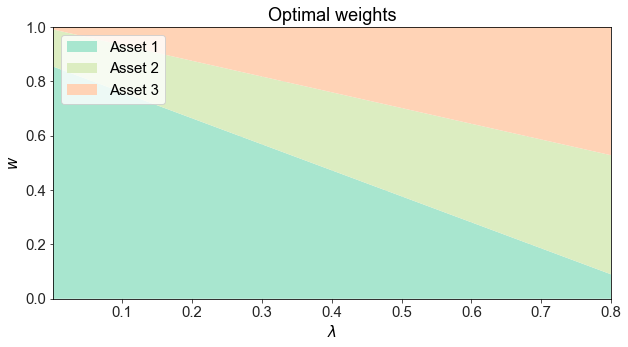

In [73]:
"""
Optimal weights
"""
fig, ax = plt.subplots(figsize=(10, 5))
ax.stackplot(risk_aversions, optimal_weights, labels=['Asset 1', 'Asset 2', 'Asset 3']); 
ax.set_xlabel('$\\lambda$')
ax.set_ylabel('$w$')
ax.set_title('Optimal weights')
ax.legend(loc='upper left');

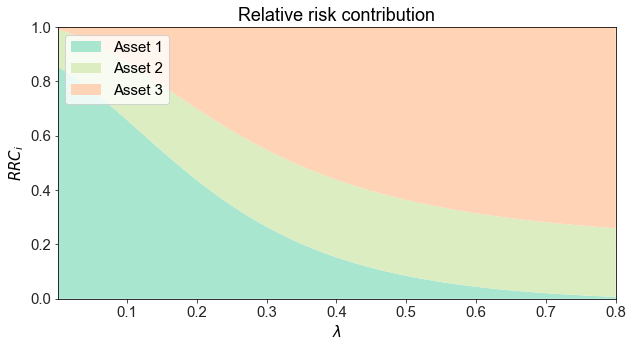

In [74]:
"""
Optimal weights
"""
fig, ax = plt.subplots(figsize=(10, 5))
ax.stackplot(risk_aversions, rel_risk_contribs, labels=['Asset 1', 'Asset 2', 'Asset 3']); 
ax.set_xlabel('$\\lambda$')
ax.set_ylabel('$RRC_i$')
ax.set_title('Relative risk contribution')
ax.legend(loc='upper left');
 

The analysis shows us that looking only at portfolio weights may be misleading when trying to understand the risk drivers of the portfolio. 

### Check formula


In [51]:
objective = lambda w: -quadratic_utility(w, mu, cov_mat, 5)

sum_to_on_constraint = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}

res = minimize(objective, [0.0/3.0, 1.0/3.0, 2.0/3.0], constraints=sum_to_on_constraint)
res.x

array([0.66416497, 0.211526  , 0.12430902])

# References



## Books

[Riccardo Rebonato and Alexander Denev, "Portfolio Management under stress"](https://www.amazon.com/Portfolio-Management-under-Stress-Bayesian-Net/dp/1107048117)